### Visualizing COVID-19 Cases for some of southern_hemisphere countries

__What do you reckon?__

Considering just numbers, seems `southern_hemisphere countries` are basically doing well on containing `COVID-19` (Brazil seems a bit too soon to judge though). But what if `seasonality` is a huge factor !?

coronavirus business_as_usual in winter is to skyrocket. Isn’t it?

I speculate that novel #coronavirus is here to stay for a while.

__Data Source__; [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)

-------

In [1]:
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

------------------
### Acquiring data and save on local machine

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
filename = 'covid19_cases.csv'

def get_data(url, filename):
    """
    
    :param url: url for targeted file to be downloaded
    :param filename: user specified name for downloaded file
    :return: save downloaded file on lochal machine
    """
    infile = requests.get(url, allow_redirects=True)
    with open(filename, 'wb') as outfile:
        outfile.write(infile.content)
    

get_data(url, filename)

---------------
### Data Preparation

In [3]:
def load_data(filename):
    
    """
    
    to load data from local machine into a pandas' Dataframe
    to carry on some cleaning, aggregating data for 
    each country, reshape, and casting right data type
    
    :param filename: file on lochal machine
    :return: wrangled dataframe
    """
    df = pd.read_csv(filename)
    df.drop(labels=['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
    df = df.groupby(['Country/Region']).sum()
    df = df.stack().reset_index()
    df.rename(mapper={'Country/Region' : 'country', 'level_1' : 'date', 0 : 'total_cases'}, axis=1, inplace=True)
    df['date'] = pd.to_datetime(df['date'])
    df = df[['date', 'country', 'total_cases']]
    
    return df

df = load_data(filename)
df.head()

,date,country,total_cases
0,2020-01-22,Afghanistan,0
1,2020-01-23,Afghanistan,0
2,2020-01-24,Afghanistan,0
3,2020-01-25,Afghanistan,0
4,2020-01-26,Afghanistan,0


-----------
### Calculate daily cases for each country

In [4]:
def daily_cases(df):
    
    """
    
    to calculate daily cases
    :param df: pandas' dataframe object
    :return: an altered dataframe object
    """
    # to add a new empty column
    df['daily_cases'] = np.nan

    # to populate new column for each country
    for nation in df.country.unique():
        df['daily_cases'].loc[df.country == nation] = df[df.country == nation]['total_cases'].diff().values
        
    df.set_index('date', drop=True, inplace=True)
    
    return df

df = daily_cases(df)
df.head()

/home/sakima/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,country,total_cases,daily_cases
date,,,
2020-01-22,Afghanistan,0,NaN
2020-01-23,Afghanistan,0,0.0
2020-01-24,Afghanistan,0,0.0
2020-01-25,Afghanistan,0,0.0
2020-01-26,Afghanistan,0,0.0


### Visualization
------

/home/sakima/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


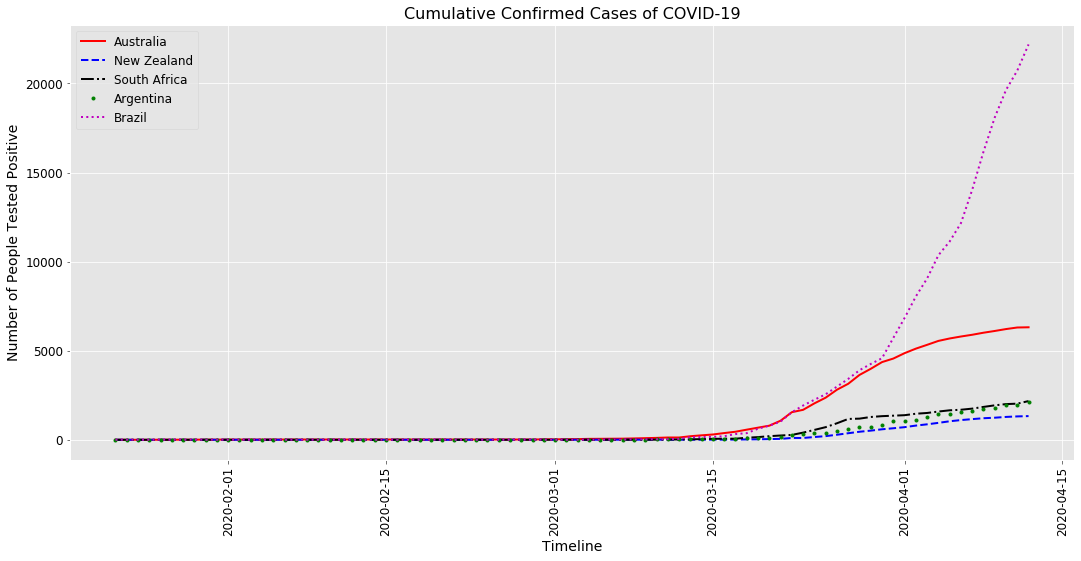

In [5]:
southern_countries = ['Australia', 'New Zealand', 'South Africa', 'Argentina', 'Brazil']
line_type = ['-', '--', '-.', '.', ':']
line_color = ['r', 'b', 'k', 'g', 'm']

with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(figsize=(18, 8))
    
    for index, nation in enumerate(southern_countries):
        plt.plot(
            df.loc[df.country == nation]['total_cases'],
            line_type[index],
            color = line_color[index],
            linewidth = 2,
            label = nation)
    
    ax.legend(loc='upper left', fontsize=12)
    
    plt.xticks(color='k', fontsize=12, rotation=90)
    plt.yticks(color='k', fontsize=12)
    
    ax.set_xlabel("Timeline", dict(color='k', fontsize=14))
    ax.set_ylabel("Number of People Tested Positive", dict(color='k', fontsize=14))
    plt.title("Cumulative Confirmed Cases of COVID-19", fontsize=16)
    
    
plt.show()
plt.close()